# EM Algorithm (https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137)
Gaussian Mixture Model (GMM) and EM

In the example mentioned earlier, we have 2 clusters: people who like the product and people who don’t. If we know which cluster each customer belongs to (the labels), we can easily estimate the parameters(mean and variance) of the clusters, or if we know the parameters for both clusters, we can predict the labels. Unfortunately, we don’t know either one. To solve this chicken and egg problem, the Expectation-Maximization Algorithm (EM) comes in handy.
EM is an iterative algorithm to find the maximum likelihood when there are latent variables. The algorithm iterates between performing an expectation (E) step, which creates a heuristic of the posterior distribution and the log-likelihood using the current estimate for the parameters, and a maximization (M) step, which computes parameters by maximizing the expected log-likelihood from the E step. The parameter-estimates from M step are then used in the next E step. In the following sections, we will delve into the math behind EM, and implement it in Python from scratch.

Assumptions:
            - prior distribution is p(y) is binomial; p(x|y) in each cluster is gaussian
            
 $observed: x, latent: y$
 
 $prior: p(y, \pi) = \pi^{1(y=1)} (1-\pi)^{1(y=0)}$

$evidence: p(x|y = 0, \mu_{0}, \Sigma_{0}) = N(\mu_{0}, \Sigma_{0}) (likelihood)$

$p(x|y = 1, \mu_{1}, \Sigma_{1}) = N(\mu_{1}, \Sigma_{1}) (likelihood)$
           
           
$\theta := \pi, \mu_{0}, \mu_{1}, \Sigma_{0}, \Sigma_{1}$ 




At the expectation (E) step, we calculate the heuristics of the posteriors. We call them heuristics because they are calculated with guessed parameters $\theta$.

E step:

for each $i \in  \{1, ..., n\}: set$

$Q(y^{i} = 1 |x^{i}) := p(y^{i} = 1| x^{i}, \theta) $

$=\frac{p(x^{i}|y^{i} = 1, \theta) p(y^{i} = 1, \theta)}{\Sigma_{y^{i} \in (0,1)} p(x^{i}|y^{i}, \theta) p(y^{i}, \theta)}$


$Q(y^{i} = 0 |x^{i}) := p(y^{i} = 0| x^{i}, \theta)$

$=\frac{p(x^{i}|y^{i} = 0, \theta) p(y^{i} = 0, \theta)}{\Sigma_{y^{i} \in (0,1)} p(x^{i}|y^{i}, \theta) p(y^{i}, \theta)}$

At the maximization (M) step, we find the maximizers of the log-likelihood and use them to update θ. Notice that the summation inside the logarithm in equation (3) makes the computational complexity NP-hard. To move the summation out of the logarithm, we use Jensen’s inequality to find the evidence lower bound (ELBO) which is tight only when Q(y|x) = P(y|x). If you are interested in the math details from equation (3) to equation (5), this article has decent explanation.

M step:

$ \theta = argmax l(\theta)$

$ = argmax \: \Sigma_{i = 1...n} \: log \: p(x^{i}, \theta)$

$= argmax \: \Sigma_{i = 1...n} \: log \: \Sigma_{y^{i} \in (0,1)} \: p(x{i}, y{i}, \theta)$

(Using Jensens's inequality and ELBO)

$\geq argmax \: \Sigma_{i = 1...n} \: \Sigma_{y^{i} \in (0,1)} \: Q(y^{i}|x^{i}) \: log \: p(x^{i},y^{i}, \theta)$

$ = argmax \: \Sigma_{i = 1...n} E_{Q(y^{i}|x^{i})} \: log \: p(x^{i}|y^{i}, \theta) \: p(y^{i}, \theta)$


### Marginal distribution

A marginal probability ca always be written as an expected value:

$p_{X} (x) = \Sigma_{y} \: p_{X|Y} \: (x|y) \: p_{Y} (y) = \: E_{Y} \: [p_{X|Y} \: (x|y)]$

Intuitively, the marginal probability of X is computed by examining the conditional probability of X given a particular value of Y, and then averaging this conditional probability over the distribution of all values of Y.

This follows from the definition of expected value (after applying the law of the unconscious statistician)

$E_{Y}[f(Y)] = \Sigma_{y} \: f(y) p_{Y}(y)$

See the last to rows above: We sum over all values of y (x is fixed) and take the product of the probability of (y|x) times a function of (y|x), which is log p((y|x)) p(x)..

Luckily, there are closed-form solutions for the maximizers in GMM.

$\pi =\frac{\Sigma_{i=1...n} Q(y^{i} = 1|x^{i})}{n}$

$ \mu_{0} = \frac{\Sigma_{i=1...n} x^{i} \: Q(y^{i} = 0|x^{i})}{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i})}$

$ \mu_{1} = \frac{\Sigma_{i=1...n} x^{i} \: Q(y^{i} = 1|x^{i})}{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i})}$

$\Sigma_{0} = \frac{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i}) \: (x^{i} - \mu_{0}) \: (x^{i} -\mu_{0})^{T}}{\Sigma_{i=1...n} \: Q(y^{i} = 0|x^{i})}$

$\Sigma_{1} = \frac{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i}) \: (x^{i} - \mu_{1}) \: (x^{i} -\mu_{1})^{T}}{\Sigma_{i=1...n} \: Q(y^{i} = 1|x^{i})}$
 



We use these updated parameters in the next iteration of E step, get the new heuristics and run M-step. What the EM algorithm does is repeat these two steps until the average log-likelihood converges.
Before jumping into the code, let’s compare the above parameter solutions from EM to the direct parameter estimates when the labels are known. Did you find they are very similar? In fact, the only difference is that the EM solutions use the heuristics of posteriors Q while the direct estimates use the true labels.

$\pi'=\frac{\Sigma_{i=1...n} 1(y^{i} = 1)}{n}$

$ \mu_{0}' = \frac{\Sigma_{i=1...n} x^{i} \: 1(y^{i} = 0)}{\Sigma_{i=1...n} \: 1(y^{i} = 0)}$

$ \mu_{1}' = \frac{\Sigma_{i=1...n} x^{i} \: 1(y^{i} = 1)}{\Sigma_{i=1...n} \: 1(y^{i} = 1)}$

$\Sigma_{0}' = \frac{\Sigma_{i=1...n} \: 1(y^{i} = 0) \: (x^{i} - \mu_{0}) \: (x^{i} -\mu_{0})^{T}}{\Sigma_{i=1...n} \: 1(y^{i} = 0)}$

$\Sigma_{1}' = \frac{\Sigma_{i=1...n} \: 1(y^{i} = 1) \: (x^{i} - \mu_{1}) \: (x^{i} -\mu_{1})^{T}}{\Sigma_{i=1...n} \: 1(y^{i} = 1)}$

# Iris dataset

It includes three iris species with 50 samples each as well as some properties of each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'iris.csv')

In [2]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
X = data.iloc[:,0:4]

In [5]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [7]:
df = pd.DataFrame(X, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["species"] = data["species"]

## Experimenting with scikit learn examples

Creating datasets to visualize true clusters 

In [8]:
setosa_sepal = df.loc[df["species"] == 'setosa', ['sepal_length','sepal_width']]
versicolor_sepal = df.loc[df["species"] == 'versicolor', ['sepal_length','sepal_width']]
virginica_sepal = df.loc[df["species"] == 'virginica', ['sepal_length','sepal_width']]

setosa_petal = df.loc[df["species"] == 'setosa', ['petal_length','petal_width']]
versicolor_petal = df.loc[df["species"] == 'versicolor', ['petal_length','petal_width']]
virginica_petal = df.loc[df["species"] == 'virginica', ['petal_length','petal_width']]



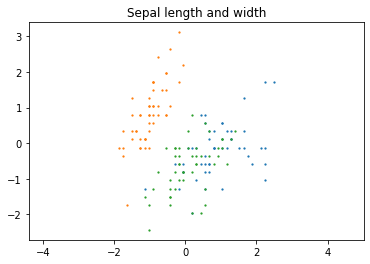

In [9]:
import matplotlib.pyplot as plt

plt.scatter(virginica_sepal.iloc[:, 0], virginica_sepal.iloc[:, 1], s=1.5)
plt.scatter(setosa_sepal.iloc[:, 0], setosa_sepal.iloc[:, 1], s=1.5)
plt.scatter(versicolor_sepal.iloc[:, 0], versicolor_sepal.iloc[:, 1], s=1.5)

plt.title("Sepal length and width")
plt.axis("equal")
plt.show()

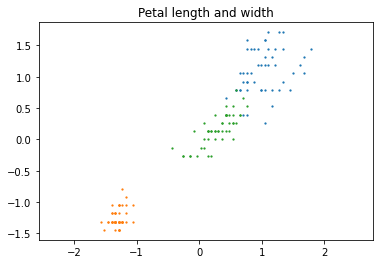

In [10]:
plt.scatter(virginica_petal.iloc[:, 0], virginica_petal.iloc[:, 1], s=1.5)
plt.scatter(setosa_petal.iloc[:, 0], setosa_petal.iloc[:, 1], s=1.5)
plt.scatter(versicolor_petal.iloc[:, 0], versicolor_petal.iloc[:, 1], s=1.5)

plt.title("Petal length and width")
plt.axis("equal")
plt.show()

## Model training and selection

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py

We vary the number of components from 1 to 6 and the type of covariance parameters to use:

"full": each component has its own general covariance matrix.
"tied": all components share the same general covariance matrix.
"diag": each component has its own diagonal covariance matrix.
"spherical": each component has its own single variance.
We score the different models and keep the best model (the lowest BIC). This is done by using GridSearchCV and a user-defined score function which returns the negative BIC score, as GridSearchCV is designed to maximize a score (maximizing the negative BIC is equivalent to minimizing the BIC).

The best set of parameters and estimator are stored in best_parameters_ and best_estimator_, respectively.

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)    # BIC is a function of the likelihood, lower BIC-> better model fit with the data


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x12c3b59d0>)

In [12]:
Y_ = grid_search.predict(X)

In [13]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Plot the BIC scores

To ease the plotting we can create a pandas.DataFrame from the results of the cross-validation done by the grid search. We re-inverse the sign of the BIC score to show the effect of minimizing it.

In [14]:
df2 = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df2["mean_test_score"] = -df2["mean_test_score"]
df2 = df2.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df2.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
8,3,tied,277.992821
19,2,full,278.688942
7,2,tied,279.895919
6,1,tied,284.401179
18,1,full,284.401179


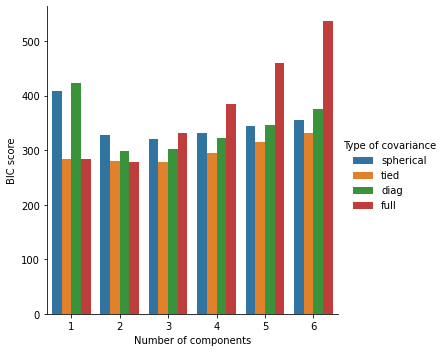

In [15]:
import seaborn as sns

sns.catplot(
    data=df2,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

## Plot the best model

We plot an ellipse to show each Gaussian component of the selected model. For such purpose, one needs to find the eigenvalues of the covariance matrices as returned by the covariances_ attribute. The shape of such matrices depends on the covariance_type:

"full": (n_components, n_features, n_features)
"tied": (n_features, n_features)
"diag": (n_components, n_features)
"spherical": (n_components,)


In [16]:
grid_search.best_estimator_.covariances_

array([[0.38651524, 0.24790338, 0.11861351, 0.06018732],
       [0.24790338, 0.59563634, 0.06441104, 0.08626649],
       [0.11861351, 0.06441104, 0.06448231, 0.03213435],
       [0.06018732, 0.08626649, 0.03213435, 0.06401032]])

ValueError: expected square matrix

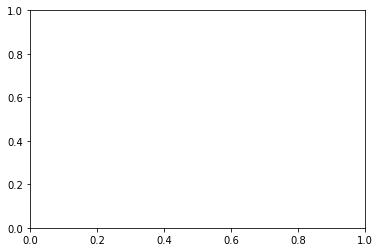

In [18]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = df[["petal_length", "petal_width"]]
X_sepal = df[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

covariances = np.array([grid_search.best_estimator_.covariances_[0:2, 0:2], grid_search.best_estimator_.covariances_[0:2, 0:2], 
          grid_search.best_estimator_.covariances_[0:2, 0:2]]) # since our best solution has the same COV for every class
# Im only using a 2x2 COV for the first two coordinates ([0:2, 0:2])

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_sepal.iloc[Y_ == i, 0], X_sepal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[0:2], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components, sepal length and width"
)
plt.axis("equal")
plt.show()

ValueError: expected square matrix

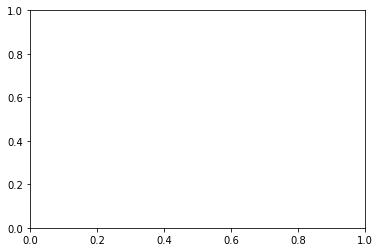

In [19]:
from matplotlib.patches import Ellipse
from scipy import linalg



color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

covariances = np.array([grid_search.best_estimator_.covariances_[2:4, 2:4], grid_search.best_estimator_.covariances_[2:4, 2:4], 
          grid_search.best_estimator_.covariances_[2:4, 2:4]]) # since our best solution has the same COV for every class
# eigenvector, eigenvalues are calculated with a reduced covariance matrix of the petal variables


for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,  # here Im taking the mean coordinates of the petal coordinates, which are stored in the 2nd and 3rd column 
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)    
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_petal.iloc[Y_ == i, 0], X_petal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])  #
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[2:4], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components, petal length and width"
)
plt.axis("equal")
plt.show()

## GMM with covariance type "full" (each Gaussian has its own COV)

In [20]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0, covariance_type='full',
                            tol=0.01,
                            max_iter=1000).fit(X)

# Scatter plot of petal variables with Gaussian ellipses

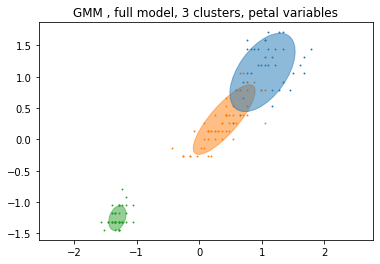

In [21]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = df[["petal_length", "petal_width"]]
X_sepal = df[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 3)[::-1]
Y_ = gm.predict(X)

fig, ax = plt.subplots()

covariances = np.array([gm.covariances_[0][2:4,2:4], gm.covariances_[1][2:4,2:4], gm.covariances_[2][2:4,2:4]])

for i, (mean, cov, color) in enumerate(
    zip(
        gm.means_,  
        covariances, # reduced COV for the coordinates 3 and 4 to calculate the eigenvectors
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_petal.iloc[Y_ == i, 0], X_petal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])  # x and y components of the main ellipse axis
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[2:4], v[0], v[1], angle=180.0 + angle, color=color)# here Im taking the mean coordinates of the petal coordinates, which are stored in the 2nd and 3rd column 
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    "GMM , full model, 3 clusters, petal variables"
)
plt.axis("equal")
plt.show()

# Scatter plot of sepal variables with Gaussian ellipses

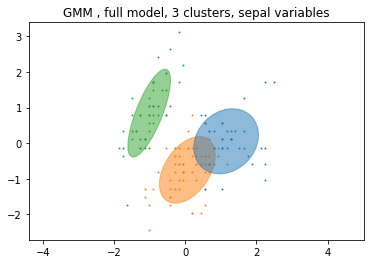

In [22]:
from matplotlib.patches import Ellipse
from scipy import linalg

X_petal = df[["petal_length", "petal_width"]]
X_sepal = df[["sepal_length", "sepal_width"]]

color_iter = sns.color_palette("tab10", 3)[::-1]
Y_ = gm.predict(X)

fig, ax = plt.subplots()

covariances = np.array([gm.covariances_[0][0:2,0:2], gm.covariances_[1][0:2,0:2], gm.covariances_[2][0:2,0:2]])

for i, (mean, cov, color) in enumerate(
    zip(
        gm.means_,   
        covariances, # reduced COV for the coordinates 1 and 2 to calculate the eigenvectors
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_sepal.iloc[Y_ == i, 0], X_sepal.iloc[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean[0:2], v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    "GMM , full model, 3 clusters, sepal variables"
)
plt.axis("equal")
plt.show()

In this graph we illustrate the 3 clusters for 2 of the four variables. Also the datapoints, which originallly live in R^4 are projected onto 2 coordinates. The shape of the ellipses is based on a reduced covariance matrix of the original 4x4 matrix. However variances and covariances seem to be modelled correctly for 2 dimensions. This makes sense, as variances and covariances are calculated for each pair of variables independently.

The iris dataset is four-dimensional. Only the first two dimensions are shown here, and thus some points are separated in other dimensions.

## PCA on the Iris data set, plotting 

In [23]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

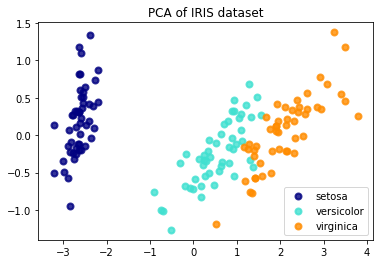

In [38]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

# Plotting contour lines of LDA of PCA projected data form the Iris data set

LDA A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the transform method.


In [39]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_r)
X = scaler.transform(X_r)

In [40]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In the following I will plot the contour lines of the decision boundaries of the LDA model for the iris data, projected onto the first two principal components

In [41]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1    # min, max of first principal component
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1    # min, max of second principal component




We can then create a uniform sample across each dimension using the

arange()

 function at a chosen resolution. We will use a resolution of 0.1 in this case.

In [42]:
# define the x and y scale
xx = np.arange(min1, max1, 0.1)
yy = np.arange(min2, max2, 0.1)

We can use the meshgrid() NumPy function to create a grid from these two vectors.

If the first feature x1 is our x-axis of the feature space, then we need one row of x1 values of the grid for each point on the y-axis.

Similarly, if we take x2 as our y-axis of the feature space, then we need one column of x2 values of the grid for each point on the x-axis.


In [43]:
# create all of the lines and rows of the grid
x_grid, y_grid = np.meshgrid(xx,yy)

# as the Iris data set is 4 dimensional, I need to create a 4 dim meshgrid


In [44]:
# flatten each grid to a vector
r1, r2 = x_grid.flatten(), y_grid.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

Then we stack the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.

In [45]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [46]:
grid

array([[-2.57304515, -3.57850278],
       [-2.47304515, -3.57850278],
       [-2.37304515, -3.57850278],
       ...,
       [ 2.62695485,  3.72149722],
       [ 2.72695485,  3.72149722],
       [ 2.82695485,  3.72149722]])

We can then feed this into our model and get a prediction for each point in the grid.

In [47]:
# make predictions for the grid
yhat = clf.predict(grid)

We have a grid of values across the feature space and the class labels as predicted by our model.

Next, we need to plot the grid of values as a contour plot.

The contourf() function takes separate grids for each axis, just like what was returned from our prior call to meshgrid(). Great!

So we can use dim1, dim2, dim3, dim4 that we prepared earlier and simply reshape the predictions (yhat) from the model to have the same shape.

In [48]:
# reshape the predictions back into a grid
zz = yhat.reshape(x_grid.shape)

In [49]:
zz

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

We then plot the decision surface with a two-color colormap.

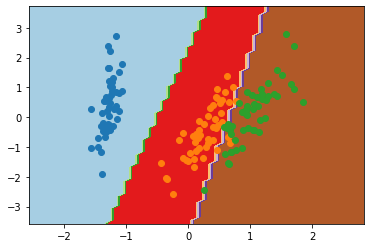

In [50]:
from matplotlib import pyplot

# plot the grid of x, y and z values as a surface
pyplot.contourf(x_grid, y_grid, zz, cmap='Paired')  

for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
